In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('Eg_After.csv')

In [5]:
data

,2D-A NumberofProtons,2D-A SpecificHeat,2D-X NumberofProtons,2D-X FirstIonization,2D-t,2D-u,3D-A NumberofProtons,3D-A SpecificHeat,3D-X NumberofShells,3D-t,3D-u,Eg
0,55,0.242,35,11.8138,1.030842,0.270408,55,0.242,4,1.030842,0.270408,3.466
1,55,0.242,35,11.8138,1.030842,0.270408,55,0.242,2,1.140495,0.398496,3.461
2,55,0.242,35,11.8138,1.030842,0.270408,55,0.242,5,1.002382,0.240909,3.442
3,55,0.242,35,11.8138,1.030842,0.270408,55,0.242,4,0.814856,0.607143,3.564
4,55,0.242,35,11.8138,1.030842,0.270408,55,0.242,3,0.820244,0.657459,3.548
...,...,...,...,...,...,...,...,...,...,...,...,...
196,37,0.363,35,11.8138,0.781185,0.607143,37,0.363,4,0.781185,0.607143,2.381
197,37,0.363,35,11.8138,0.781185,0.607143,37,0.363,2,0.799704,0.894737,2.165
198,37,0.363,35,11.8138,0.781185,0.607143,37,0.363,4,0.928578,0.352041,3.172
199,37,0.363,35,11.8138,0.781185,0.607143,37,0.363,2,0.997651,0.518797,2.523


Text(0.5, 1.0, '2D-u')

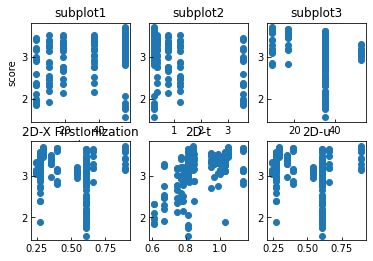

In [64]:
#plot 1
x = data['2D-A NumberofProtons']
y = data['Eg']
plt.subplot(2,3,1)
plt.scatter(x,y)
plt.title("subplot1")
# plt.xlabel("k", fontproperties = 'Times New Roman', size = 12)
# plt.ylabel("score", fontproperties = 'Times New Roman', size = 12)
plt.xlabel("k")
plt.ylabel("score")

#plot 2
x = data['2D-A SpecificHeat']
y = data['Eg']
plt.subplot(2,3,2)
plt.scatter(x,y)
plt.title("subplot2")

#plot 3
x = data['2D-X NumberofProtons']
y = data['Eg']
plt.subplot(2,3,3)
plt.scatter(x,y)
plt.title("subplot3")

#plot 4
x = data['2D-u']
y = data['Eg']
plt.subplot(2,3,4)
plt.scatter(x,y)
plt.title("2D-X FirstIonization")

#plot 5
x = data['2D-t']
y = data['Eg']
plt.subplot(2,3,5)
plt.scatter(x,y)
plt.title("2D-t")

#plot 6
x = data['2D-u']
y = data['Eg']
plt.subplot(2,3,6)
plt.scatter(x,y)
plt.title("2D-u")

In [25]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from gplearn import genetic
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ensemble  # ensemble learning: 集成学习
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [26]:
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])

for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

R2: 0.9965117726064495
RMSE: 0.16042462095479784
r: (0.9378423958889652, 1.606582151340201e-19)
MAE: 0.12105046060608658
R2b: 0.8786991235152425
MSE: 0.02573605900849056


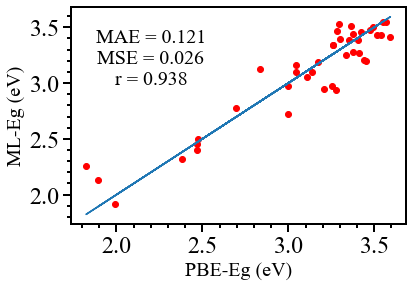

In [27]:
#计算准确率xgboost
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

clf = XGBRegressor(n_estimators=2000, max_depth=100, eta=0.1, gamma=0, subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)
clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.2, 2.8, 'MAE = 0.121\nMSE = 0.026\nr = 0.938\n', fontproperties = 'Times New Roman', size = 20, horizontalalignment='center')
plt.savefig('xgboost-test.tif', dpi=300, bbox_inches = 'tight')
plt.show()

In [28]:
#使用KFold交叉验证

for nk in range(2,10):
 kfolder = KFold(n_splits=nk, shuffle=True, random_state=2021)
 score=0
 for train, test in kfolder.split(X_train, y_train):
   train_data = np.array(data)[train]
   test_data = np.array(data)[test]
   trany=train_data[:,11]
   tranx=train_data[:,:11]
   testx=test_data[:,:11]
   testy=test_data[:,11]
   clf.fit(tranx,trany)
   pu=pearsonr(testy,clf.predict(testx))
   score=score+pu[0]
 print(score/nk, nk)

0.801987074325141 2
0.8544004802316693 3
0.8068696735406692 4
0.8801511667091839 5
0.8651483240011499 6
0.8603534402050002 7
0.8373019294319812 8
0.8881996730551516 9


In [59]:
#使用KFold交叉验证

for nk in range(2,10):
 kfolder = KFold(n_splits=nk, shuffle=True, random_state=2021)
 score=0
 for train, test in kfolder.split(X_train, y_train):
   train_data = np.array(data)[train]
   test_data = np.array(data)[test]
   trany=train_data[:,11]
   tranx=train_data[:,:11]
   testx=test_data[:,:11]
   testy=test_data[:,11]
   clf.fit(tranx,trany)
   pu=pearsonr(testy,clf.predict(testx))
   score=score+pu[0]
 print(score/nk, nk)

0.801987074325141 2
0.8544004802316693 3
0.8068696735406692 4
0.8801511667091839 5
0.8651483240011499 6
0.8603534402050002 7
0.8373019294319812 8
0.8881996730551516 9


In [60]:
df = pd.DataFrame(data=[0.801987074325141,0.8544004802316693,0.8068696735406692,0.8801511667091839,0.8651483240011499,0.8603534402050002,0.8373019294319812,0.8881996730551516], 
                  index = [2,3,4,5,6,7,8,9],
                  columns=['score'])
df

,score
2,0.801987
3,0.854400
4,0.806870
5,0.880151
6,0.865148
7,0.860353
8,0.837302
9,0.888200


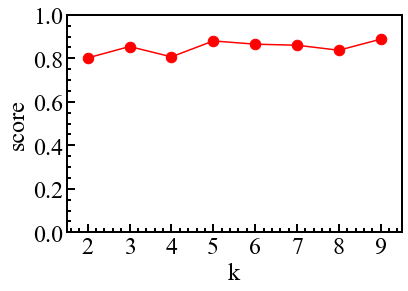

In [61]:
#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.scatter(df.index, df.score, s=111, c='r')
plt.plot(df.index, df.score, c='r')

ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)

x_major_locator=MultipleLocator(1) #把x轴的刻度间隔设置为1，并存在变量里
ax.xaxis.set_major_locator(x_major_locator) #把x轴的主刻度设置为1的倍数
y_major_locator=MultipleLocator(0.2) #把y轴的刻度间隔设置为10，并存在变量里
ax.yaxis.set_major_locator(y_major_locator) #把y轴的主刻度设置为10的倍数

plt.xlim(1.5,9.5)
plt.ylim(0,1)

plt.minorticks_on()

plt.xlabel("k", fontproperties = 'Times New Roman', size = 24)
plt.ylabel("score", fontproperties = 'Times New Roman', size = 24)

plt.savefig('10-fold-crossvalidation.tif', dpi=300, bbox_inches = 'tight')
plt.show()